<a href="https://colab.research.google.com/github/joony0512/Deep_Learning_Class/blob/main/Part5/P5_Ch06_CH06_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM seq2seq

## DataLoader 만들기

In [1]:
!pip install portalocker

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os
import sys
from datetime import datetime

drive_project_root = '/content/drive/MyDrive/#fastcampus'
sys.path.append(drive_project_root)
!pip install -r '/content/drive/MyDrive/#fastcampus/requirements.txt'

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.4/722.4 kB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.6/144.6 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 71.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 59.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 86.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.6/222.6 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.4/435.4 kB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >=0 :
    print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
    print('and then re-execute this cell')
else :
    print(gpu_info)

Thu Jul 13 08:56:25 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
!pip install omegaconf
!pip install torch_optimizer
!pip install wandb
!pip install efficientnet_pytorch==0.7.1
!pip install hydra-core==1.1
!pip install pytorch-lightning
!pip install --upgrade torchmetrics
!pip install --upgrade pytorch-lightning

  Using cached omegaconf-2.3.0-py3-none-any.whl (79 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=54c5d199bc78d0e92cd496f22399047b21f4366173cfaf1c59f07589a0111eab
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Successfully built antlr4-python3-runtime


  Using cached torch_optimizer-0.3.0-py3-none-any.whl (61 kB)
  Using cached pytorch_ranger-0.1.1-py3-none-any.whl (14 kB)
  Using cached wandb-0.15.5-py3-none-any.whl (2.1 MB)
  Using cached GitPython-3.1.32-py3-none-any.whl (188 kB)
  Using cached sentry_sdk-1.28.0-py2.py3-none-any.whl (213 kB)
  Using cached docker_pycreds-0.4.0-py2.py3-none-any.whl (9.0 kB)
  Using cached pathtools-0.1.2-py3-none-any.whl
  Using cached setproctitle-1.3.2-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (30 kB)
  Using cached gitdb-4.0.10-py3-none-any.whl (62 kB)
  Using cached smmap-5.0.0-py3-none-any.whl (24 kB)
  Using cached efficientnet_pytorch-0.7.1-py3-none-any.whl
  Using cached hydra_core-1.1.0-py3-none-any.whl (144 kB)
  Using cached omegaconf-2.1.2-py3-none-any.whl (74 kB)
  Using cached antlr4_python3_runtime-4.8-py3-none-any.whl
  Attempting uninstall: antlr4-python3-runtime
    Found existing installation: antlr4-python3-runtime 4.9.3
  

  Using cached pytorch_lightning-2.0.5-py3-none-any.whl (722 kB)
  Using cached torchmetrics-1.0.0-py3-none-any.whl (728 kB)
  Using cached lightning_utilities-0.9.0-py3-none-any.whl (23 kB)


In [5]:
# for data loading
from typing import List
from typing import Dict
from typing import Union
from typing import Any
from typing import Optional
from typing import Iterable
from typing import Callable
from abc import abstractmethod
from abc import ABC
from datetime import datetime
from functools import partial
from collections import Counter
from collections import OrderedDict
import random
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch
from torch import optim
import torch.nn.functional as F
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader
import torch.nn as nn
import pytorch_lightning as pl
from pprint import pprint

from torchtext import data
from torchtext import datasets
from torchtext.datasets import Multi30k
from torchtext.data.utils import get_tokenizer
from torchtext.data.functional import to_map_style_dataset
from torchtext.vocab import Vocab, build_vocab_from_iterator, vocab
import spacy

# for contiguration
from omegaconf import DictConfig
from omegaconf import OmegaConf
import hydra
from hydra.core.config_store import ConfigStore

# for logger
from torch.utils.tensorboard import SummaryWriter
import wandb
os.environ["WANDB_START_METHOD"] ="thread"

In [6]:

%cd /content/drive/MyDrive/#fastcampus
from data_utils import dataset_split
from config_utils import flatten_dict
from config_utils import register_config
from config_utils import configure_optimizers_from_cfg
from config_utils import get_loggers
from config_utils import get_callbacks
%cd /content


/content/drive/MyDrive/#fastcampus
/content


In [7]:
# download spacy data
!python -m spacy download en
!python -m spacy download en_core_web_sm
!python -m spacy download de
!python -m spacy download de_core_news_sm


2023-07-13 08:57:43.744067: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 89.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
2023-07-13 08:58:09.106266: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 95.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
2023-07-13 08:58:25.961304: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
⚠ As of spaCy v3.0, shortcuts like 'de' are deprecated. Please use the
full pipeline package name 'de_core_news_sm' instead.
     ━━━━━━━━━━

In [8]:
data_spacy_de_en_cfg = {
    "name" : "spacy_de_en",
    "data_root" : os.path.join(os.getcwd(), "data"),
    "tokenizer" : "spacy",
    "src_lang" : "de",
    "tgt_lang" : "en",
    "src_index" : 0,
    "tgt_index" : 1,
    "vocab" :{
        "special_symbol2index" :{
            "<unk>" : 0, # 모르는 단어 처리
            "<pad>" : 1, # 길이 다른것 패딩으로 처리
            "<bos>" : 2, # 끝부분 표시
            "<eos>" : 3, # 첫부분 표시
        } ,
        "special_first" : True, # 위의 것들을 맨처음으로 배치
        "min_freq" : 2,
    }
}

data_cfg = OmegaConf.create(data_spacy_de_en_cfg)
print(OmegaConf.to_yaml(data_cfg))

name: spacy_de_en
data_root: /content/data
tokenizer: spacy
src_lang: de
tgt_lang: en
src_index: 0
tgt_index: 1
vocab:
  special_symbol2index:
    <unk>: 0
    <pad>: 1
    <bos>: 2
    <eos>: 3
  special_first: true
  min_freq: 2



In [9]:
train_data, valid_data, test_data = Multi30k(data_cfg.data_root)
test_data = to_map_style_dataset(test_data)

In [10]:
for i in test_data :
    print(i)
    break

('Ein Mann mit einem orangefarbenen Hut, der etwas anstarrt.', 'A man in an orange hat starring at something.')


In [11]:
# 1. token_transform ( token ... )
def get_token_transform(data_cfg : DictConfig) -> dict :
    token_transform : dict ={}
    token_transform[data_cfg.src_lang] = get_tokenizer(
        data_cfg.tokenizer, language = data_cfg.src_lang
        )
    token_transform[data_cfg.tgt_lang] = get_tokenizer(
        data_cfg.tokenizer, language = data_cfg.tgt_lang
        )
    return token_transform

token_transform = get_token_transform(data_cfg)

/usr/local/lib/python3.10/dist-packages/torchtext/data/utils.py:105: UserWarning: Spacy model "de" could not be loaded, trying "de_core_news_sm" instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchtext/data/utils.py:105: UserWarning: Spacy model "en" could not be loaded, trying "en_core_web_sm" instead
  warnings.warn(


In [12]:
# 2. vocab_transform

def yeild_tokens(
    data_iter : Iterable, lang : str, lang2index : Dict[str, int],
) -> List[str] :
    """help function to yeild list of tokens"""
    for data_sample in data_iter:
        yield token_transform[lang](data_sample[lang2index[lang]])

def get_vocab_transform(data_cfg : DictConfig) -> dict :
    vocab_transform : dict = {}
    for ln in [data_cfg.src_lang, data_cfg.tgt_lang]:
        # build from train_data
        train_iter = Multi30k(
            split = 'train', language_pair =(data_cfg.src_lang, data_cfg.tgt_lang)
        )
        # create torchtext's Vocab object
        vocab_transform[ln] =build_vocab_from_iterator(
            yeild_tokens(
                train_iter,
                ln,
                {
                    data_cfg.src_lang : data_cfg.src_index,
                    data_cfg.tgt_lang : data_cfg.tgt_index,
                }
            ),
            min_freq = data_cfg.vocab.min_freq,
            specials = list(data_cfg.vocab.special_symbol2index.keys()),
            special_first = True
        )

    # set UNKNOWM as the default index, --> index가 unknown으로 return : token이 찾아지지 않을 경우
    # 만약 세팅되지 않으면 runtime error가 날 수 있다.
    for ln in [data_cfg.src_lang, data_cfg.tgt_lang]:
        vocab_transform[ln].set_default_index(data_cfg.vocab.special_symbol2index["<unk>"])
    return vocab_transform

vocab_transform = get_vocab_transform(data_cfg)


In [13]:
print(vocab_transform['de']['<bos>'])
print(vocab_transform['en']['<bos>'])
print(vocab_transform['en']['hello'],vocab_transform['en']['world'])

2
2
5465 1870


In [14]:
# 3. integrated transforms
# --> text_transform : [token_transform -> vocab_transform -> torch.tensor transform]

# helper function for collate_fn

def sequential_transforms(*transforms):
    def func(txt_input):
        for transform in transforms :
            txt_input = transform(txt_input)
        return txt_input
    return func

# convert to torch.tensor with bos & eos
def tensor_transform(token_ids : List[int], bos_index : int, eos_index : int ):
    return torch.cat(
        (torch.tensor([bos_index]),torch.tensor(token_ids) ,torch.tensor([eos_index]))
        )

# src & tgt lang language text_transforms to convert raw strings --> tensor indices
def get_text_transform(data_cfg: DictConfig):
    text_transform = {}
    for ln in [data_cfg.src_lang, data_cfg.tgt_lang]:
        text_transform[ln] = sequential_transforms(
            token_transform[ln],
            vocab_transform[ln],
            partial(
                tensor_transform,
                bos_index = data_cfg.vocab.special_symbol2index["<bos>"],
                eos_index = data_cfg.vocab.special_symbol2index["<eos>"],
            )
        )
    return text_transform

text_transform = get_text_transform(data_cfg)

In [15]:
print(text_transform["en"]('hello'))
print(text_transform["en"]('hello,'))
print(text_transform["en"]('hello, how'))
print(text_transform["en"]('hello, how are you ?'))

tensor([   2, 5465,    3])
tensor([   2, 5465,   15,    3])
tensor([   2, 5465,   15,  889,    3])
tensor([   2, 5465,   15,  889,   17, 1328, 2470,    3])


In [16]:
# 4. collate_fn --> batch를 전처리 할까?

def collate_fn(batch, data_cfg: DictConfig):
    src_batch , tgt_batch =[], []

    for src_sample, tgt_sample in batch :
        src_batch.append(text_transform[data_cfg.src_lang](src_sample.rstrip('\n')))
        tgt_batch.append(text_transform[data_cfg.tgt_lang](tgt_sample.rstrip('\n')))

    src_batch = pad_sequence(src_batch, padding_value= data_cfg.vocab.special_symbol2index['<pad>'])
    tgt_batch = pad_sequence(tgt_batch, padding_value= data_cfg.vocab.special_symbol2index['<pad>'])
    return src_batch, tgt_batch

def get_collate_fn(cfg : DictConfig):
    return partial(collate_fn, data_cfg = cfg.data)

# 5. DataLoader

def get_multi30k_dataloader(split_mode : str , language_pair : tuple, batch_size : int, collate_fn: Callable):

    iter = Multi30k(split=split_mode, language_pair =language_pair)
    dataset = to_map_style_dataset(iter)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size =batch_size , collate_fn = collate_fn )
    return dataloader


test_dataloader =get_multi30k_dataloader('test', (data_cfg.src_lang, data_cfg.tgt_lang), 3, collate_fn = partial(collate_fn, data_cfg = data_cfg))

In [17]:
for i in test_dataloader :
    print(i)
    break

(tensor([[   2,    2,    2],
        [   5,    5,    5],
        [  12, 3686,   27],
        [  10, 4015,    7],
        [   6,   86,    6],
        [ 178,   43, 2872],
        [ 108,    0, 3028],
        [   8,  120,   20],
        [  16,   28,  295],
        [  78,    6,   10],
        [   0,   52,    6],
        [   4,  327, 4942],
        [   3,    4,    4],
        [   1,    3,    3]]), tensor([[   2,    2,    2],
        [   6,    6,    6],
        [  12, 3374,   33],
        [   7, 4932,    7],
        [  28,   10,  872],
        [  91,   82,  234],
        [  68,    9, 3453],
        [2670, 2602,    4],
        [  20,   51,  343],
        [ 122,  101,   14],
        [   5,    7,    4],
        [   3,   44,   44],
        [   1,   13,  840],
        [   1,    4,    5],
        [   1,   24,    3],
        [   1,  274,    1],
        [   1,    5,    1],
        [   1,    3,    1]]))


In [18]:
SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True


## pytorch - lighting

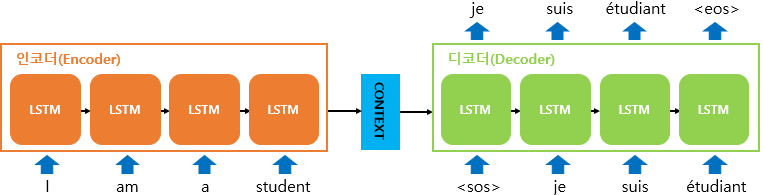


In [24]:
def _test_postprocessing(res : List[str]) -> str :
  if '<eos>' in res :
    res = res[:res.index('<eos>')]
  if '<pad>' in res:
    res = res[:res.index['<pad>']]
  res = " ".join(res).replace("<bos>", "")
  return res


class BaseTranslateLightningModule(pl.LightningModule):
  def __init__(self, cfg : DictConfig):
    super().__init__()
    self.cfg = cfg
    self.loss_function = torch.nn.CrossEntropyLoss(
        ignore_index = cfg.data.vocab.special_symbol2index['<pad>'] # 학습 안하기 위해 지정
    )
  def configure_optimizers(self):
    self._optimizers, self._schedulers = configure_optimizers_from_cfg(
        self.cfg, self
    )
  @abstractmethod # 모델마다 forward가 다르기 때문에 지정. 추상화 메소드
  def forward(self, src, tgt, teacher_forcing_ratio = float):
    raise NotImplementedError()

  def _forward(self, src, tgt, mode : str, teacher_forcing_ratio: float = 0.5):
    # teacher forcing :
    # seq2seq 에서 많이 쓰인다.
    # src -> tgt autoregressive 학습하면, 맨 최초는 학습을 빠르게 한다. 근데 미래부분학습은 ? -> 앞부분 될때까지 기다리기 너무 힘들다
    # 랜덤으로 미래정보도 조금 둬서 뒤에 있는 정보도 학습이 가능하게 하자
    # 0.5 ? --> 0.5확률로 teacher_forcing을 하겠다.

    assert mode in ['train', 'valid', 'test']

    # get predictions
    # teacher forcing 용 input -->
    tgt_inputs = tgt[:-1, :] # delete ends for teacher forcing inputs : 맨 뒷부분이 필요하지 않아서 제거한다
    outputs = self(src, tgt_inputs, teacher_forcing_ratio = teacher_forcing_ratio)
    tgt_outputs = tgt[1, :] # delete start token

    loss = self.loss_function(
        outputs.reshape(-1, outputs.shape[-1]), # [ batch x sequence, other_output_shape]
        tgt_outputs.reshape(-1),
        )
    logs_detail ={
        f"{mode}_src" : src ,
        f"{mode}_tgt" : tgt ,
        f"{mode}_results" : outputs ,

    }

    if mode in ["val", "test"]:
      _, tgt_results = torch.max(outputs, dim = 2)

      src_texts =[]
      tgt_texts =[]
      res_texts =[]

      # convert [L X B X others] --> [B X L X others]
      for src_i in torch.transpose(src, 0, 1).detach().cpu().numpy().tolist(): # no gradient, use cpu, numpy transform, list
        res = vocab_transform[self.cfg.data.src_lang].lookup_tokens(src_i)
        src_texts.append(_test_postprocessing(res))

      for tgt_i in torch.transpose(tgt, 0, 1).detach().cpu().numpy().tolist(): # no gradient, use cpu, numpy transform, list
        res = vocab_transform[self.cfg.data.tgt_lang].lookup_tokens(tgt_i)
        tgt_texts.append(_test_postprocessing(res))

      for tgt_res_i in torch.transpose(tgt_results, 0, 1).detach().cpu().numpy().tolist(): # no gradient, use cpu, numpy transform, list
        res = vocab_transform[self.cfg.data.tgt_lang].lookup_tokens(tgt_res_i)
        res_texts.append(_test_postprocessing(res))

    text_result_summary ={
        f"{mode}_src_text" : src_texts,
        f"{mode}_tgt_text" : tgt_texts,
        f"{mode}_results_text" : res_texts,
    }
    print(f"{self.global_step} step: \n src_text: {src_texts[0]}, \n tgt texts : {tgt_texts[0]}, \n result_text: {res_texts[0]}")
    logs_detail.update(text_result_summary)

    return {f"{mode}_loss":loss}, logs_detail

  def training_step(self, batch, batch_idx):
    src, tgt = batch[0], batch[1]
    logs, _ =  self._forward(src, tgt, "train", self.cfg.model.teacher_forcing_ratio)
    self.logs_dicts(logs)
    logs['loss'] = logs['train_loss']
    return logs

  def validation_step(self, batch, batch_idx):
    src, tgt = batch[0], batch[1]
    logs, logs_detail =  self._forward(src, tgt, "val", 0.0)
    self.logs_dicts(logs)
    logs['loss'] = logs['val_loss']
    logs.update(logs_detail)
    return logs

  def test_step(self, batch, batch_idx):
    src, tgt = batch[0], batch[1]
    logs, logs_detail =  self._forward(src, tgt, "test", 0.0)
    self.logs_dicts(logs)
    logs['loss'] = logs['test_loss']
    logs.update(logs_detail)
    return logs

## model definition


In [21]:
# utils for initialization
def init_weights(model : Union[nn.Module, pl.LightningModule]):
  for name, param in model.named_parameters():
    nn.init.uniform_(param.data, -0.08, 0.08)


In [25]:
# model definition

# 1. encoder (??)
class LSTMEncoder(nn.Module):
  def __init__(
      self,
      input_dim : int,
      embed_dim : int,
      hidden_dim : int,
      n_layers : int,
      dropout : float,
  ):
    super().__init__()
    self.hidden_dim = hidden_dim
    self.n_layers = n_layers

    self.embedding = nn.Embedding(input_dim, embed_dim)
    self.rnn = nn.LSTM(embed_dim, hidden_dim, n_layers, dropout = dropout)
    self.dropout = nn.Dropout(dropout)

    #initialize weights
    self.apply(init_weights)


  def forward(self, src):
    # src = [seq_len, batch_size]
    embedded = self.dropout(self.embedding(src)) # [seq_len, batch_size, emb_dim]

    outputs , (hidden, cell)=self.rnn(embedded)

    # outputs = [seq_len, batch_size, hidden_dim * n directional]
    # hidden , cell = [n_layers * n_directions , batch_size, hidden_dim ]

    # outputs will be used from top hidden layers
    return hidden, cell

# 2. decoder (??)
class LSTMDecoder(nn.Module):
  def __init__(
      self,
      input_dim : int,
      output_dim : int,
      embed_dim : int,
      hidden_dim : int,
      n_layers : int,
      dropout : float,
  ):
    super().__init__()
    self.hidden_dim = hidden_dim
    self.n_layers = n_layers

    self.embedding = nn.Embedding(input_dim, embed_dim)
    self.rnn = nn.LSTM(embed_dim, hidden_dim, n_layers, dropout = dropout)
    self.fc_out = nn.Linear(hidden_dim, output_dim)

    self.dropout = nn.Dropout(dropout)

  def forward(self, input, hidden, cell):
    # input : [batch size X ...] <- start_token
    # outputs = [seq_len, batch_size, hidden_dim * n directional]
    # hidden , cell = [n_layers * 1_directions , batch_size, hidden_dim ]

    input = input.unsqueeze(0) # <- [1, batch_size]
    embedded = self.dropout(self.embedding(input))

    #embedding = [1, batch_size, embed_dim]
    output , (hidden, cell) = self.rnn(embedded, (hidden, cell))

    # output = [1, batch_size, hidden_dim]
    # hidden , cell = [n_layers * 1_directions , batch_size, hidden_dim ]

    prediction = self.fc_out(output.squeeze(0)) #[ batch_size, output_dim]

    return prediction, hidden, cell

# 3. Seq2Seq(cfg) <-- encoder + decoder
class LSTMSeqSeq(BaseTranslateLightningModule):
  def __init__(self, cfg: DictConfig):
    super().__init__(cfg)

    self.encoder = LSTMEncoder(**cfg.model.enc)
    self.decoder = LSTMDecoder(**cfg.model.dec)

    assert self.encoder.hidden_dim == self.decoder.hidden_dim
    assert self.encoder.n_layers == self.decoder.n_layers

    # parameter initializing
    self.apply(init_weights)

  def forward(self, src, tgt, teacher_forcing_ratio : float =0.5):

    # src, tgt = [seq_len (can be diffrent), batch_size]
    # for val, test teacher forcing should be 0.0

    batch_size = tgt.shape[0]
    tgt_len = tgt.shape[0]
    tgt_vocab_size = self.decoder.output_dim

    # tensor to store decoder outputs
    outputs = torch.zeros(tgt_len, batch_size, tgt_vocab_size).to(self.device)

    hidden, cell = self.encoder(src)

    # start_token_input (<sos> tokens)
    input = tgt[0, :]
    for t in range(1, tgt_len):

      # get one cell's output
      output, hidden, cell = self.decoder(input, hidden, cell)

      # set to all outputs results
      outputs[t] = output

      # decide whether going to use teacher forcing or not.
      teacher_force = random.random() < teacher_forcing_ratio

      top1 = output.argmax(1) #logits 에서 가장 확률높은 토큰 뽑기

      input = tgt[t] if teacher_forcing else top1

    return outputs


